# Dataset  description:
I chose the TMDb movie dataset. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Data columns :
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']

## Questions to answer :


1) Does zero budget mean zero revenue?

2) Does high_budget mean high_revenue and vice versa ?

3) How movie production is improving over the years?

4) Most active Production companies :

5) Most common genres :

6) Which genres make more revenue?

7) Runtime change over the years :

8) Top rated movies revenue vs other movies revenue

9) How many times does some genre repeat?

# 

# Analyzing Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Mohamed\Downloads\tmdb-movies.csv")

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df=data.copy()

In [6]:
# drop columns that's not important
df.drop(columns =['homepage','tagline','keywords','overview','release_date','budget_adj','revenue_adj'],inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [7]:
df.set_index(['id','imdb_id'],inplace=True)

## 

## <\\> Clean the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10866 entries, (135397, 'tt0369610') to (22293, 'tt0060666')
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


In [9]:
df.production_companies.value_counts()

Paramount Pictures                                                                                            156
Universal Pictures                                                                                            133
Warner Bros.                                                                                                   84
Walt Disney Pictures                                                                                           76
Columbia Pictures                                                                                              72
                                                                                                             ... 
New Line Cinema|Spring Creek Productions|BenderSpink|Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 1 KG      1
Gordon Bijelonic / Datari Turner Films|Enderby Entertainment                                                    1
CineEvelyn                                                                              

In [10]:
df[df.production_companies.isnull()]

,,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,,
300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,36,7.8,2015
360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,10,7.6,2015
363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,12,6.3,2015
354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,10,4.7,2015
308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,29,6.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15867,tt0077742,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,35,6.3,1978
24998,tt0077598,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,12,5.9,1978
16378,tt0077147,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,14,6.0,1978


In [11]:
df[df.cast.isnull()]

,,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,,
345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,47,6.9,2015
355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,37,8.2,2015
321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,19,7.8,2015
333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,12,8.0,2015
224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,11,8.9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,tt0093832,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,Pixar Animation Studios,44,6.6,1987
48714,tt0061402,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,NaN,12,6.7,1968
48784,tt0060984,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,Pensylvania Academy of Fine Arts,16,5.2,1967


In [12]:
df[df.director.isnull()]

,,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,,
320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,14,6.6,2015
355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,12,7.5,2015
321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,14,6.5,2015
259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,32,6.3,2014
253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,11,7.2,2014
256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,Valve,40,7.0,2014
296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,18,5.7,2014
301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2 Entertain Video,12,6.8,2014
133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,19,7.5,2009


In [13]:
df[df.genres.isnull()]

,,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,,
363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,21,6.1,2015
361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,13,5.0,2015
287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,13,6.8,2014
21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,57,7.4,2009
40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,11,7.0,2009
127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,NaN,12,5.8,2010
315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,NaN,11,7.7,2010
57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,12,7.2,2001
54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,NaN,11,6.1,2008


In [14]:
# We notice that all NaN values have too many zeroes in "budget","revenue" and too small values in "vote_count"
# which mean it's absurd data 
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9773 entries, (135397, 'tt0369610') to (22293, 'tt0060666')
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9773 non-null   float64
 1   budget                9773 non-null   int64  
 2   revenue               9773 non-null   int64  
 3   original_title        9773 non-null   object 
 4   cast                  9773 non-null   object 
 5   director              9773 non-null   object 
 6   runtime               9773 non-null   int64  
 7   genres                9773 non-null   object 
 8   production_companies  9773 non-null   object 
 9   vote_count            9773 non-null   int64  
 10  vote_average          9773 non-null   float64
 11  release_year          9773 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [16]:
df.head()

,,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [17]:
df[df.original_title.duplicated()]

,,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,,
281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,John Lyde,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,23,4.9,2014
42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,Fred Zinnemann,117,Drama,Twentieth Century Fox Film Corporation,10,5.0,1977
7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,Jim Sheridan,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,381,6.7,2009
62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,Yann Arthus-Bertrand,95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),109,7.8,2009
79896,tt1336006,0.310600,0,0,The Revenant,Chris Wylde|David Anders|Louise Griffiths|Jacy...,D. Kerry Prior,110,Comedy|Horror,Putrefactory Limited|Wanko Toys,30,5.5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13333,tt0077594,0.581236,0,0,Game of Death,Bruce Lee|Kareem Abdul-Jabbar|Chuck Norris|Col...,Robert Clouse,103,Drama|Action|Thriller|Crime,Golden Harvest Company|Concord Productions Inc.,50,6.4,1978
17212,tt0078067,0.184723,0,0,Patrick,Susan Penhaligon|Robert Helpmann|Rod Mullinar|...,Richard Franklin,112,Horror|Science Fiction|Thriller,Filmways Australasian|Australian International...,10,6.0,1978
2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,Leslie H. Martinson,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,99,5.9,1966


In [18]:
# We find "original_title" has many duplicates & it's not effective
# as we have "id" , so drop the column

df.drop(columns={'original_title'} , inplace = True)

In [19]:
df[df.duplicated()]

,,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [20]:
df=df.drop_duplicates()

In [21]:
df.shape

(9772, 11)

# 

## <\\> Explore the data

In [22]:
df.popularity.describe()

count    9772.000000
mean        0.694721
std         1.036931
min         0.000188
25%         0.232710
50%         0.419762
75%         0.776408
max        32.985763
Name: popularity, dtype: float64

In [23]:
#scale popurality as a rate from 100
scaler=MinMaxScaler()
df['popularity'] = np.round(scaler.fit_transform(df[['popularity']])*100)

In [24]:
df.head()

,,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,
135397,tt0369610,100.0,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
76341,tt1392190,86.0,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
262500,tt2908446,40.0,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
140607,tt2488496,34.0,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
168259,tt2820852,28.0,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [25]:
df.popularity.describe()

count    9772.000000
mean        2.101310
std         3.167059
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       100.000000
Name: popularity, dtype: float64

In [26]:
# Here we notice the extreme difference between 
# most popular movies and other movies
# About 75% of the data is under 2%

In [27]:
df.query('popularity>2').shape
# Almost they represent only 10% of the data 

(2269, 11)

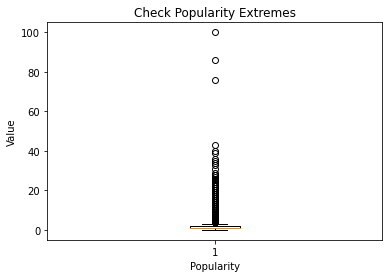

In [28]:
plt.boxplot(df.popularity)
plt.xlabel('Popularity')
plt.ylabel('Value')
plt.title('Check Popularity Extremes')
plt.show();

In [29]:
# Split the dataset into 2 datasets not to have bad analysis result cuz of extremes
popular = df.nlargest(2269,'popularity')
normal = df.drop(popular.index)

# We can work on both datasets as the same , the below code will be on "normal"
# and just show most popular movies

# 

# Most popular movies

In [30]:
popular

,,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,
135397,tt0369610,100.0,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
76341,tt1392190,86.0,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
157336,tt0816692,76.0,165000000,621752480,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014
118340,tt2015381,43.0,170000000,773312399,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,5612,7.9,2014
262500,tt2908446,40.0,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
624,tt0064276,3.0,360000,0,Peter Fonda|Dennis Hopper|Antonio Mendoza|Phil...,Dennis Hopper,95,Action|Adventure|Crime|Drama,Raybert Productions|Pando Company Inc.,186,6.6,1969
3116,tt0064665,3.0,3600000,44785053,Dustin Hoffman|Jon Voight|Sylvia Miles|John Mc...,John Schlesinger,113,Drama,United Artists|Florin Productions|Jerome Hellm...,124,7.0,1969
6081,tt0078163,3.0,0,49579269,Peter Sellers|Andrew Sachs|Herbert Lom|Burt Kw...,Blake Edwards,104,Action|Comedy|Thriller|Crime|Family,United Artists|Jewel Productions|Pimlico Films...,56,6.2,1978


In [31]:
# Rescale popularity in normal data
scaler=MinMaxScaler()
normal['popularity'] = np.round(scaler.fit_transform(normal[['popularity']])*100)

In [32]:
normal.head()

,,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,
322456,tt4189260,100.0,0,0,Nolan North|Troy Baker|Diedrich Bader|Khary Pa...,Brandon Vietti,48,Action|Adventure|Animation|Family,Warner Bros. Animation,14,6.4,2015
302528,tt3704050,100.0,0,1986615,Christopher Plummer|Martin Landau|Dean Norris|...,Atom Egoyan,94,Drama|Thriller,Serendipity Point Films|Egoli Tossell Film AG,75,7.7,2015
222936,tt1243974,100.0,37000000,26250020,Bradley Cooper|Emma Stone|Rachel McAdams|John ...,Cameron Crowe,105,Adventure|Comedy|Romance,Columbia Pictures|Vinyl Films|Regency Enterpri...,469,5.2,2015
316002,tt1137470,100.0,26000000,0,Jake Gyllenhaal|Jessica Biel|James Marsden|Cat...,David O. Russell|Stephen Greene,100,Romance|Comedy,K. JAM Media,64,3.6,2015
365806,tt4856322,100.0,0,0,Steve Downes|Jen Taylor|Michelle Lukes|Travis ...,Ian Kirby,67,Action|Animation|Science Fiction,343 Industries|The Sequence Group,32,5.3,2015


In [33]:
normal.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,7503.000000,7.503000e+03,7.503000e+03,7503.000000,7503.000000,7503.000000,7503.000000
mean,52.419032,7.476963e+06,1.179720e+07,101.019725,65.155271,5.853485,2000.081301
std,33.199177,1.691411e+07,3.780743e+07,29.135182,143.118073,0.920604,13.490749
min,0.000000,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,50.000000,0.000000e+00,0.000000e+00,90.000000,16.000000,5.300000,1992.000000
50%,50.000000,0.000000e+00,0.000000e+00,98.000000,29.000000,5.900000,2005.000000
75%,50.000000,7.000000e+06,5.973165e+06,109.500000,68.000000,6.500000,2011.000000
max,100.000000,4.250000e+08,1.123747e+09,877.000000,4368.000000,8.700000,2015.000000


In [34]:
# We also notice there are too many "Zero budget" 
# and we need to analyze budget & revenue -not zeroes-

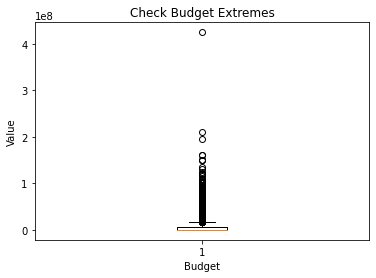

In [35]:
plt.boxplot(normal.budget)
plt.xlabel('Budget')
plt.ylabel('Value')
plt.title('Check Budget Extremes')
plt.show();

In [36]:
s= normal.drop(normal[normal.budget==0].index)

In [37]:
s.shape

(3036, 11)

In [38]:
s.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3036.000000,3.036000e+03,3.036000e+03,3036.000000,3036.000000,3036.000000,3036.000000
mean,63.586957,1.847815e+07,2.473187e+07,105.024704,104.068841,5.833103,1999.736166
std,31.555177,2.244572e+07,5.497320e+07,22.888363,211.917404,0.865061,12.222750
min,0.000000,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,50.000000,4.000000e+06,0.000000e+00,92.000000,23.000000,5.300000,1993.000000
50%,50.000000,1.100000e+07,4.408284e+06,100.000000,52.000000,5.900000,2003.000000
75%,100.000000,2.500000e+07,2.876302e+07,114.000000,117.000000,6.500000,2009.000000
max,100.000000,4.250000e+08,1.123747e+09,540.000000,4368.000000,8.400000,2015.000000


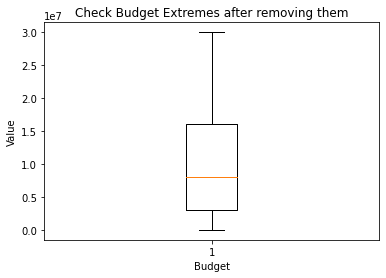

In [39]:
s=s.drop(s[s.budget>s.budget.quantile(0.8)].index)
plt.boxplot(s.budget)
plt.xlabel('Budget')
plt.ylabel('Value')
plt.title('Check Budget Extremes after removing them')
plt.show();

In [40]:
s.head()

,,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,imdb_id,,,,,,,,,,,
316002,tt1137470,100.0,26000000,0,Jake Gyllenhaal|Jessica Biel|James Marsden|Cat...,David O. Russell|Stephen Greene,100,Romance|Comedy,K. JAM Media,64,3.6,2015
10317,tt1018765,100.0,28000000,7002261,Sandra Bullock|Anthony Mackie|Billy Bob Thornt...,David Gordon Green,108,Drama|Comedy,Participant Media|Smokehouse Pictures,122,5.7,2015
354110,tt2271563,100.0,11000000,0,Demi Moore|Kiefer Sutherland|Donald Sutherland...,Jon Cassar,90,Western|Drama,Minds Eye Entertainment|Panacea Entertainment|...,53,5.6,2015
306745,tt1658801,100.0,7000000,573335,Julianne Moore|Ellen Page|Steve Carell|Michael...,Peter Sollett,103,Romance|Drama,Double Feature Films|Endgame Entertainment|Hig...,86,7.1,2015
292431,tt3774694,100.0,3000000,695269,Karl Glusman|Aomi Muyock|Klara Kristin|Juan Sa...,Gaspar NoÃ©,134,Drama|Romance,Wild Bunch|Les CinÃ©mas de la Zone|Rectangle P...,307,4.7,2015


In [41]:
# Splitting genres column
dummies = s.genres.str.get_dummies(sep="|")
s=pd.concat([s,dummies],axis=1)
s

,,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,imdb_id,,,,,,,,,,,,,,,,,,,,,
316002,tt1137470,100.0,26000000,0,Jake Gyllenhaal|Jessica Biel|James Marsden|Cat...,David O. Russell|Stephen Greene,100,Romance|Comedy,K. JAM Media,64,3.6,...,0,0,0,0,1,0,0,0,0,0
10317,tt1018765,100.0,28000000,7002261,Sandra Bullock|Anthony Mackie|Billy Bob Thornt...,David Gordon Green,108,Drama|Comedy,Participant Media|Smokehouse Pictures,122,5.7,...,0,0,0,0,0,0,0,0,0,0
354110,tt2271563,100.0,11000000,0,Demi Moore|Kiefer Sutherland|Donald Sutherland...,Jon Cassar,90,Western|Drama,Minds Eye Entertainment|Panacea Entertainment|...,53,5.6,...,0,0,0,0,0,0,0,0,0,1
306745,tt1658801,100.0,7000000,573335,Julianne Moore|Ellen Page|Steve Carell|Michael...,Peter Sollett,103,Romance|Drama,Double Feature Films|Endgame Entertainment|Hig...,86,7.1,...,0,0,0,0,1,0,0,0,0,0
292431,tt3774694,100.0,3000000,695269,Karl Glusman|Aomi Muyock|Klara Kristin|Juan Sa...,Gaspar NoÃ©,134,Drama|Romance,Wild Bunch|Les CinÃ©mas de la Zone|Rectangle P...,307,4.7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,tt0060934,50.0,12000000,20000000,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.0,...,0,0,0,0,1,0,0,0,1,0
42701,tt0062262,50.0,75000,0,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,Monte Hellman,82,Western,Proteus Films,12,5.5,...,0,0,0,0,0,0,0,0,0,1
2161,tt0060397,50.0,5115000,12000000,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,42,6.7,...,0,0,0,0,0,1,0,0,0,0


#### We can do the same to all categorical columns

#### 

In [42]:
# We won't deal with "cast" , "production_companies"
d=s.drop(columns={"cast" , "production_companies" , "genres"})
d

,,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,imdb_id,,,,,,,,,,,,,,,,,,,,,
316002,tt1137470,100.0,26000000,0,David O. Russell|Stephen Greene,100,64,3.6,2015,0,0,...,0,0,0,0,1,0,0,0,0,0
10317,tt1018765,100.0,28000000,7002261,David Gordon Green,108,122,5.7,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
354110,tt2271563,100.0,11000000,0,Jon Cassar,90,53,5.6,2015,0,0,...,0,0,0,0,0,0,0,0,0,1
306745,tt1658801,100.0,7000000,573335,Peter Sollett,103,86,7.1,2015,0,0,...,0,0,0,0,1,0,0,0,0,0
292431,tt3774694,100.0,3000000,695269,Gaspar NoÃ©,134,307,4.7,2015,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,tt0060934,50.0,12000000,20000000,Robert Wise,182,28,7.0,1966,1,1,...,0,0,0,0,1,0,0,0,1,0
42701,tt0062262,50.0,75000,0,Monte Hellman,82,12,5.5,1966,0,0,...,0,0,0,0,0,0,0,0,0,1
2161,tt0060397,50.0,5115000,12000000,Richard Fleischer,100,42,6.7,1966,0,1,...,0,0,0,0,0,1,0,0,0,0


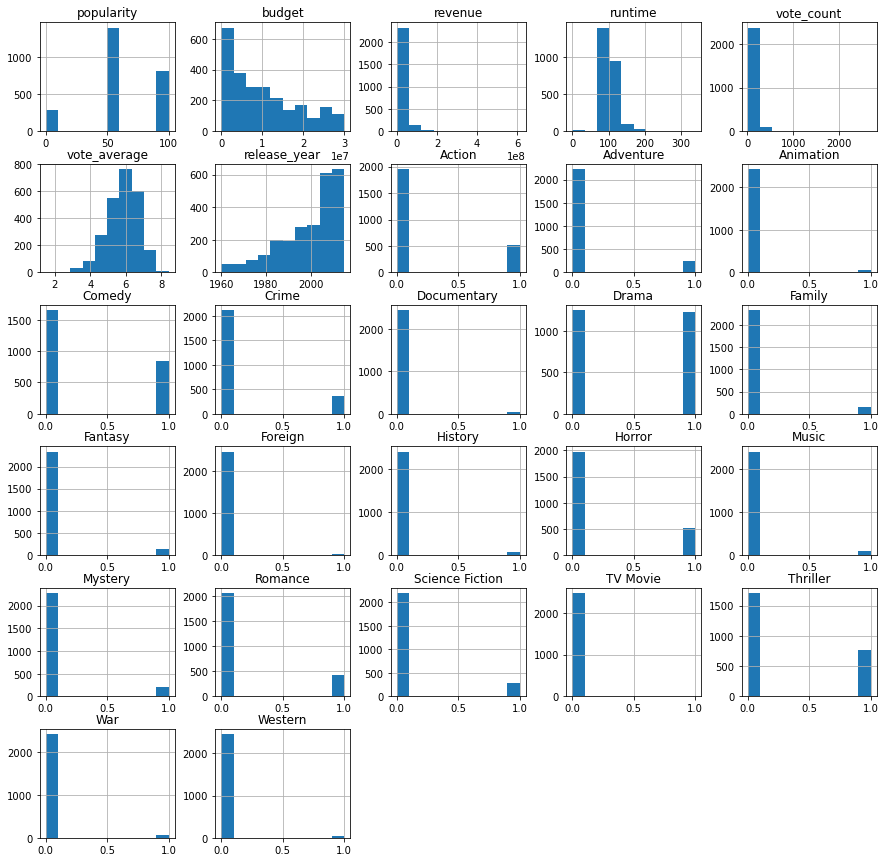

In [43]:
d.hist(figsize=(15,15));

# 

### We have more than one dataset .. most of work is on "d" , but we may need the others in some questions

# 

# Question marks on the normal data :

## 1) Does zero budget mean zero revenue?

In [44]:
# We need to deal with zero "budget_movies" separatley from "low_budget" movies
# then we can deal with low\high budget\revenue
normal.query('budget==0 & revenue==0').shape,normal.query('budget==0 | revenue==0').shape

((3642, 11), (5577, 11))

In [45]:
3642/5577

0.6530392684238838

## Answer :
### In more than 65% of cases .. when budget=0 --> revenue=0

# 

## 2) Does high_budget mean high_revenue and vice versa ?

In [46]:
# How many times were the budget & revenue high together? 
d.query('budget>budget.mean() & revenue>revenue.mean()').shape

(455, 28)

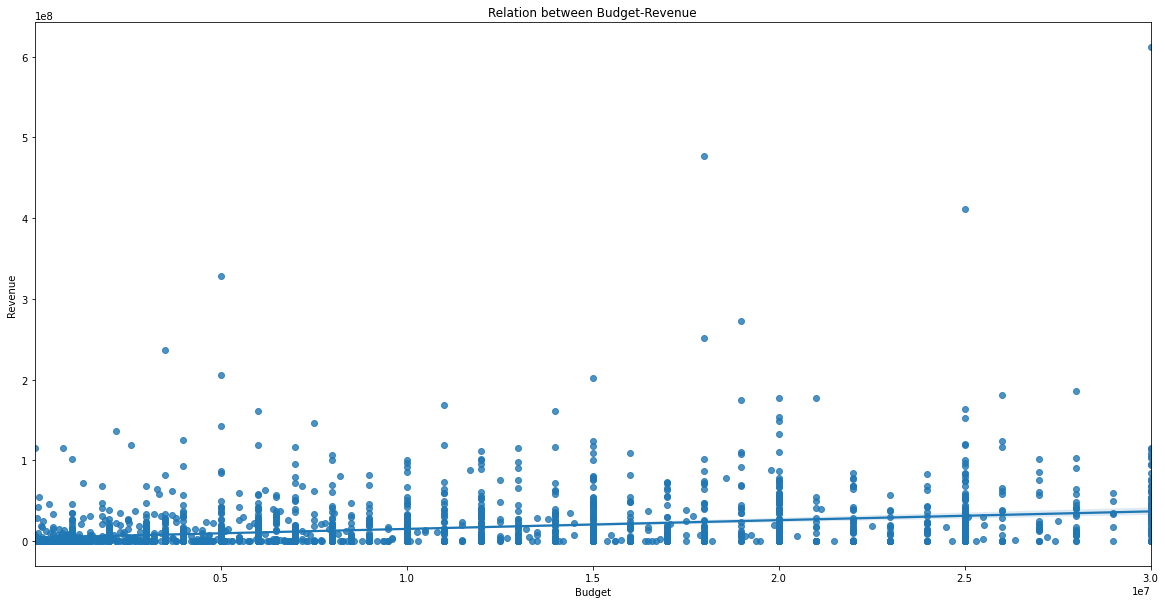

In [47]:
plt.figure(figsize=(20,10))
sns.regplot(data=d,x='budget',y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relation between Budget-Revenue')
plt.show();

In [48]:
# We find almost no relation
455/len(d)

0.1830249396621078

## Answer :
### In about 80% of cases .. high_budget doesn't mean high_revenue and vice versa.

# 

## 3) How movie production is improving over the years?

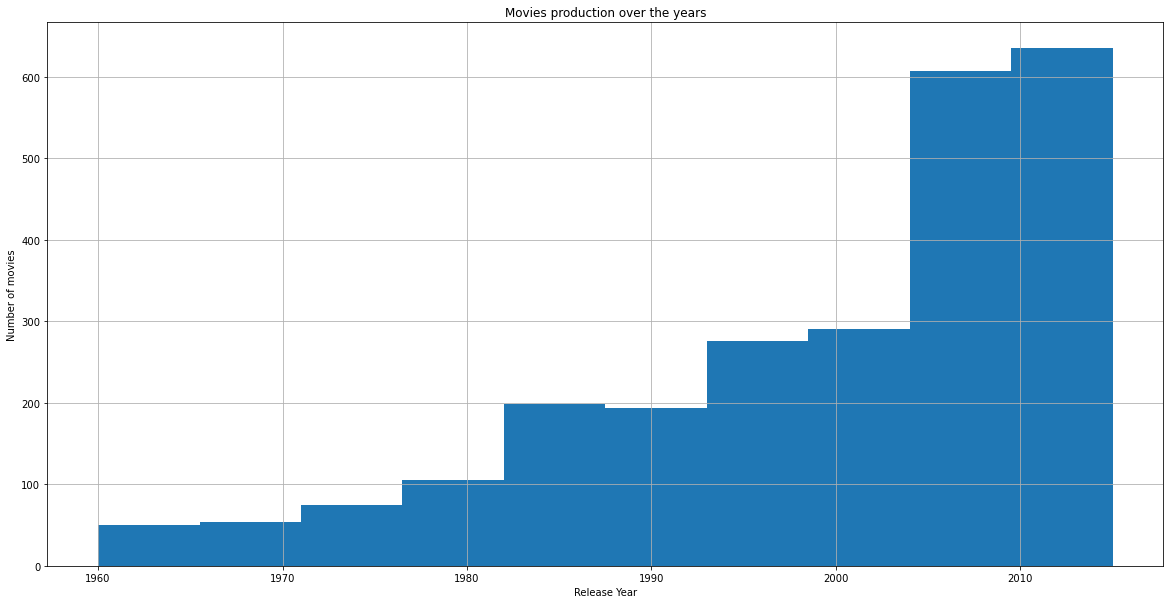

In [49]:
plt.figure(figsize=(20,10))
d.release_year.hist();
plt.xlabel('Release Year')
plt.ylabel('Number of movies')
plt.title('Movies production over the years')
plt.show();

# 



## 4) Most active Production companies :

In [50]:
# Extracting production companies one by one
p = pd.DataFrame(Counter(" ".join(df["production_companies"].str.lower()).split("|")).most_common(25),columns=['production_company','frequency'])
p

,production_company,frequency
0,warner bros.,159
1,relativity media,65
2,canal+,63
3,metro-goldwyn-mayer (mgm),42
4,dune entertainment,40
5,regency enterprises,39
6,touchstone pictures,39
7,universal pictures,35
8,studiocanal,33
9,amblin entertainment,31


<Figure size 1440x720 with 0 Axes>

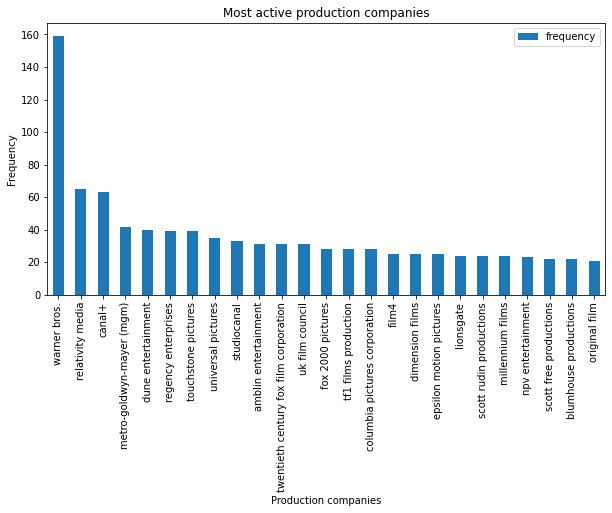

In [51]:
plt.figure(figsize=(20,10))
p.plot(kind='bar',figsize=(10,5))
plt.xlabel('Production companies')
plt.ylabel('Frequency')
plt.title('Most active production companies')
locs,labels=plt.xticks()
new_xticks=p.production_company
plt.xticks(locs,new_xticks)
plt.show();

# 

## 5) Most common genres :

In [52]:
# Extracting genres one by one
c=pd.DataFrame(Counter(" ".join(s["genres"]).split('|')).most_common(25),columns=['genres','frequency'])
c

,genres,frequency
0,Drama,346
1,Comedy,177
2,Crime,144
3,Thriller,142
4,Adventure,133
5,Action,123
6,Horror,120
7,Thriller Drama,108
8,Mystery,98
9,Science Fiction,97


<Figure size 1440x720 with 0 Axes>

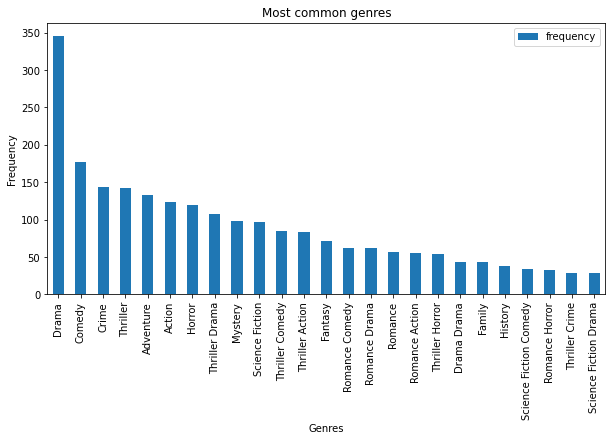

In [53]:
plt.figure(figsize=(20,10))
c.plot(kind='bar',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Most common genres')
locs,labels=plt.xticks()
new_xticks=c['genres']
plt.xticks(locs,new_xticks)
plt.show();

# 

## 6) Which genres make more revenue?

In [54]:
# "genres" dataframe contains genres columns in d + revenue
genres=d.iloc[:,8:29]
genres['revenue']=d.revenue
genres

,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue
id,imdb_id,,,,,,,,,,,,,,,,,,,,,
316002,tt1137470,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10317,tt1018765,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7002261
354110,tt2271563,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
306745,tt1658801,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,573335
292431,tt3774694,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,695269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,tt0060934,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,20000000
42701,tt0062262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2161,tt0060397,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12000000


In [55]:
# creating dataframe to contain every genre and revenue came from it
q=pd.DataFrame(columns=['revenue'],index=list(genres.columns.drop('revenue')))
q

,revenue
Action,NaN
Adventure,NaN
Animation,NaN
Comedy,NaN
Crime,NaN
Documentary,NaN
Drama,NaN
Family,NaN
Fantasy,NaN
Foreign,NaN


In [56]:
# calculating revenue for each genre
for i in genres[q.index] :
    counter=0
    pointer=-1
    for j in genres[i] :
        pointer+=1
        if j==1 :
            counter+=genres.revenue.iloc[pointer]
    q.at[i]=counter
q

,revenue
Action,7361963076
Adventure,4457128838
Animation,460622932
Comedy,16072466727
Crime,5231278478
Documentary,698363528
Drama,20151034763
Family,3774478676
Fantasy,1432494462
Foreign,53258408


In [57]:
# sorting the data to have a nice chart shape
q=q.sort_values(by='revenue',ascending=False)

<Figure size 1440x720 with 0 Axes>

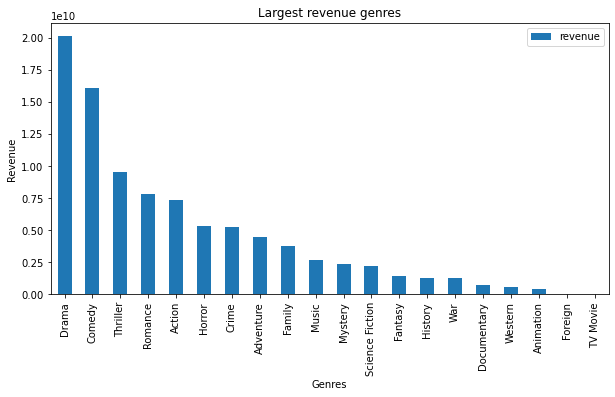

In [58]:
plt.figure(figsize=(20,10))
q.plot(kind='bar',figsize=(10,5))
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Largest revenue genres')
plt.show();

# 

## 7) Runtime change over the years :

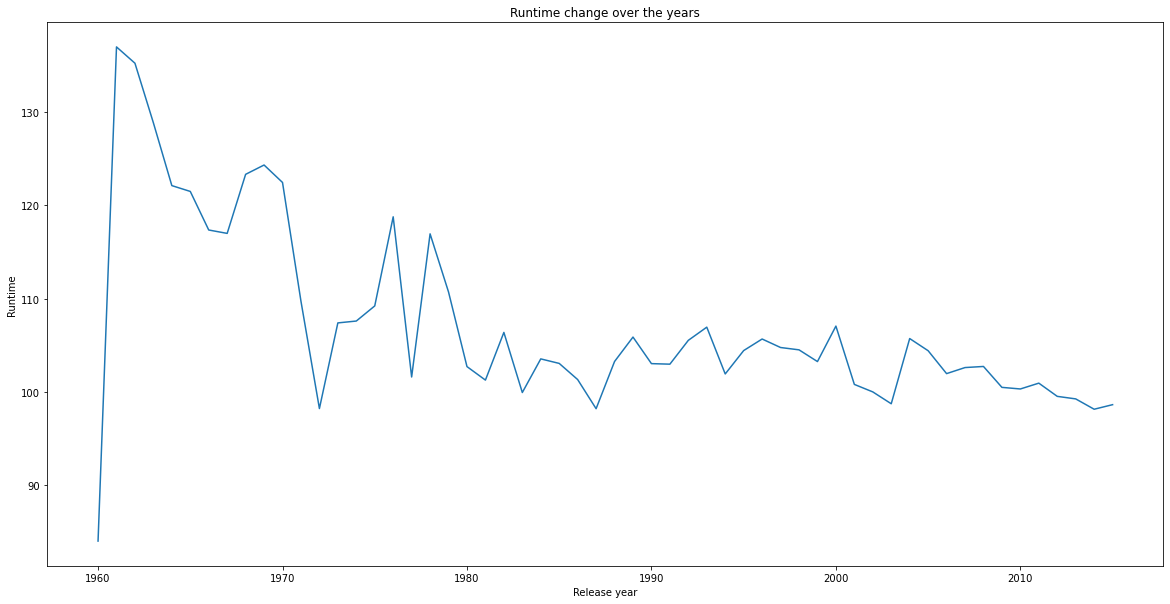

In [59]:
plt.figure(figsize=(20,10))
d.groupby('release_year')['runtime'].mean().plot()
plt.xlabel('Release year')
plt.ylabel('Runtime')
plt.title('Runtime change over the years')
plt.show();

# 

## 8) Top rated movies revenue vs other movies revenue

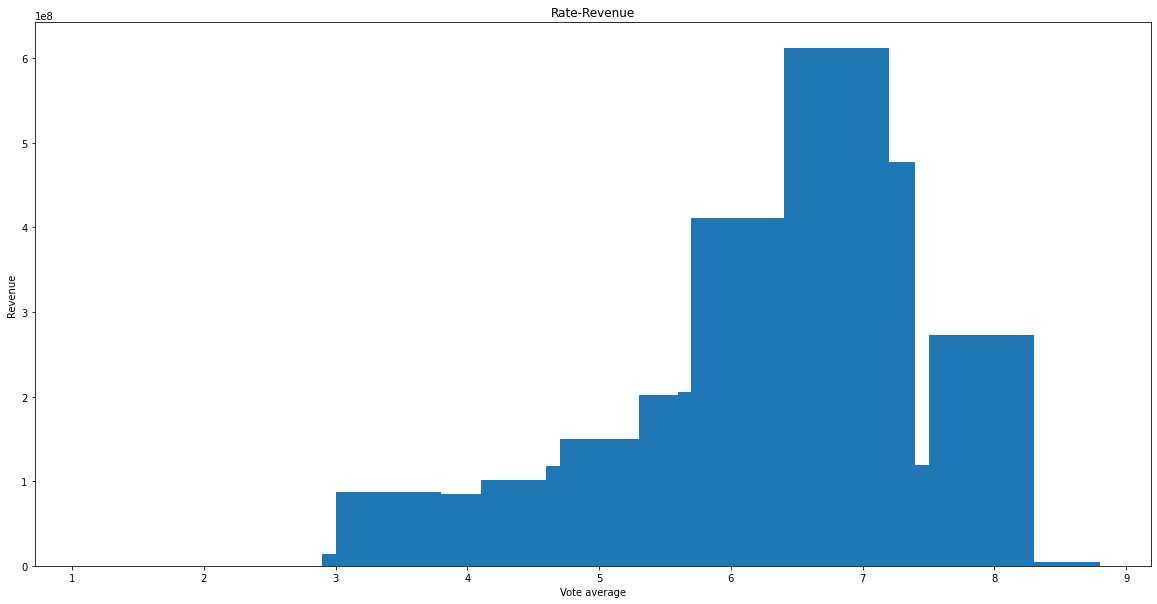

In [60]:
plt.figure(figsize=(20,10))
rate=pd.DataFrame()
rate['vote_average'],rate['revenue']=d['vote_average'],d['revenue']
plt.bar(rate['vote_average'],rate['revenue'])
plt.xlabel('Vote average')
plt.ylabel('Revenue')
plt.title('Rate-Revenue')
plt.show();

# 

## 9) How many times does some genre repeat?

In [61]:
# We've sorted "Most common genres" , but what if you want to know a specific genre frequency?
def genre_freq(df,genre) :
    genres = df['genres'].str.split('|')
    freq=0
    for i in genres :
        for j in i :
            if j== genre :
                freq +=1
    return freq
# Note : This function works on the whole dataset of movies

In [62]:
print(genre_freq(df,'Drama'))

4364


# 

# 

# <\\> Conclusion :


### <ins> Questions & answers : 

##### Q1\ Does zero budget mean zero revenue?

    A1\ No, it doesn't in most cases. 

##### Q2\ Does high_budget mean high_revenue and vice versa ?

    A2\ No, it doesn't in most cases.

##### Q3\ How movie production is improving over the years?

    A3\ It's improving exponentially , see the chart.

##### Q4\ Most active Production companies :
    
    A4\ See the whole sort & chart upside , here are top 5 :
    
        1) warner bros.
        2) relativity media
        3) canal+
        4) metro-goldwyn-mayer (mgm)
        5) dune entertainment	

##### Q5\ Most common genres :
    
    A5\ See the whole sort & chart upside , here are top 5 :
    
        1) Drama
        2) Comedy
        3) Crime
        4) Thriller
        5) Adventure


##### Q6\ Which genres make more revenue?

    A6\ See the whole sort & chart upside , here are top 5 :
    
        1) Drama
        2) Comedy
        3) Thriller
        4) Romance
        5) Action

##### Q7\ Runtime change over the years :
    
    A7) It started short (less than hour) , then too long (about 2.5 hours)
        , then it almost 100 mins in average.

##### Q8\ Top rated movies revenue vs other movies revenue

    A8) Movies that rated more than 5.5 have too larger revenue
    than those have less rate.

##### Q9\ How many times does some genre repeat?

    A9) There is "genre_freq" function to calculate any genre frequency.
        For example : Drama movies frequency = 4364


# 

## <\\> Limmitation :

I think if those columns were available they would be very useful in the analysis process :

1) Country

2) Production time (working End_date - Start_date)

3) Film hero age (To see the most popular age average)

# 

# Thank you ..